# auto-mpg-dataset

In [1]:
#Criação de paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

In [21]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white') #definindo estilo dos graficos

In [3]:
#carregando dados
data = pd.read_csv('mpg_final.csv')
data

,origin,cylinders,model_year,mpg_level,car_company,car_name,mpg,displacement,horsepower,weight,acceleration
0,usa,8,70,medium,chevrolet,chevelle malibu,18.0,307.0,130.0,3504.0,12.0
1,usa,8,70,low,buick,skylark 320,15.0,350.0,165.0,3693.0,11.5
2,usa,8,70,medium,plymouth,satellite,18.0,318.0,150.0,3436.0,11.0
3,usa,8,70,low,amc,rebel sst,16.0,304.0,150.0,3433.0,12.0
4,usa,8,70,medium,ford,torino,17.0,302.0,140.0,3449.0,10.5
...,...,...,...,...,...,...,...,...,...,...,...
387,usa,4,82,medium,ford,mustang gl,27.0,140.0,86.0,2790.0,15.6
388,europe,4,82,high,volkswagen,pickup,44.0,97.0,52.0,2130.0,24.6
389,usa,4,82,high,dodge,rampage,32.0,135.0,84.0,2295.0,11.6
390,usa,4,82,medium,ford,ranger,28.0,120.0,79.0,2625.0,18.6


##  Verificação dos Dados

In [4]:
#verificar dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   origin        392 non-null    object 
 1   cylinders     392 non-null    int64  
 2   model_year    392 non-null    int64  
 3   mpg_level     392 non-null    object 
 4   car_company   392 non-null    object 
 5   car_name      390 non-null    object 
 6   mpg           392 non-null    float64
 7   displacement  392 non-null    float64
 8   horsepower    392 non-null    float64
 9   weight        392 non-null    float64
 10  acceleration  392 non-null    float64
dtypes: float64(5), int64(2), object(4)
memory usage: 33.8+ KB


In [5]:
# 
#1 - existem duas variaveis que precisam ser convertidas de int para str
#2 - variavel 'car_name' possui 2 valores nulos

In [6]:
#converter as variaveis 'cylinders' e 'model_year' para o tipo 'object'
data['cylinders'] = data['cylinders'].astype(str)
data['model_year'] = data['model_year'].astype(str)

In [7]:
#exibindo dados nulos
print('Exibindo Valores Nulos')
display(data.loc[data['car_name'].isnull()])
print('\n')

display(f'Percentual de Valores Nulos no Dataset:{len(data.loc[data.car_name.isnull()])/len(data):.2%}')
print('\n')

print('Filtro por car_company = subaru')
display(data.query("car_company == 'subaru'"))

print('Os valores nulos serão preenchidos com a moda da variavel car_name onde o car_company for igual a subaru')

Exibindo Valores Nulos


,origin,cylinders,model_year,mpg_level,car_company,car_name,mpg,displacement,horsepower,weight,acceleration
148,japan,4,74,medium,subaru,NaN,26.0,108.0,93.0,2391.0,15.5
342,japan,4,81,high,subaru,NaN,32.3,97.0,67.0,2065.0,17.8


'Percentual de Valores Nulos no Dataset:0.51%'



Filtro por car_company = subaru


,origin,cylinders,model_year,mpg_level,car_company,car_name,mpg,displacement,horsepower,weight,acceleration
148,japan,4,74,medium,subaru,NaN,26.0,108.0,93.0,2391.0,15.5
237,japan,4,77,high,subaru,dl,30.0,97.0,67.0,1985.0,16.4
328,japan,4,80,high,subaru,dl,33.8,97.0,67.0,2145.0,18.0
342,japan,4,81,high,subaru,NaN,32.3,97.0,67.0,2065.0,17.8


Os valores nulos serão preenchidos com a moda da variavel car_name onde o car_company for igual a subaru


In [8]:
#tratando os dados nulos

#atribuindo a moda a uma variavel
moda = data.query("car_company == 'subaru'")['car_name'].mode()

#substituindo os valores nulos
data['car_name'].fillna(moda[0],inplace=True)

#verificando
data.query("car_company == 'subaru'")

,origin,cylinders,model_year,mpg_level,car_company,car_name,mpg,displacement,horsepower,weight,acceleration
148,japan,4,74,medium,subaru,dl,26.0,108.0,93.0,2391.0,15.5
237,japan,4,77,high,subaru,dl,30.0,97.0,67.0,1985.0,16.4
328,japan,4,80,high,subaru,dl,33.8,97.0,67.0,2145.0,18.0
342,japan,4,81,high,subaru,dl,32.3,97.0,67.0,2065.0,17.8


# Analise Exploratoria dos Dados

## Analise de variaveis categoricas

In [9]:
#criando dataset com as variaveis categoricas

cats = list(data.select_dtypes(include=['object']).columns)
dfcat = data[cats]
dfcat

,origin,cylinders,model_year,mpg_level,car_company,car_name
0,usa,8,70,medium,chevrolet,chevelle malibu
1,usa,8,70,low,buick,skylark 320
2,usa,8,70,medium,plymouth,satellite
3,usa,8,70,low,amc,rebel sst
4,usa,8,70,medium,ford,torino
...,...,...,...,...,...,...
387,usa,4,82,medium,ford,mustang gl
388,europe,4,82,high,volkswagen,pickup
389,usa,4,82,high,dodge,rampage
390,usa,4,82,medium,ford,ranger


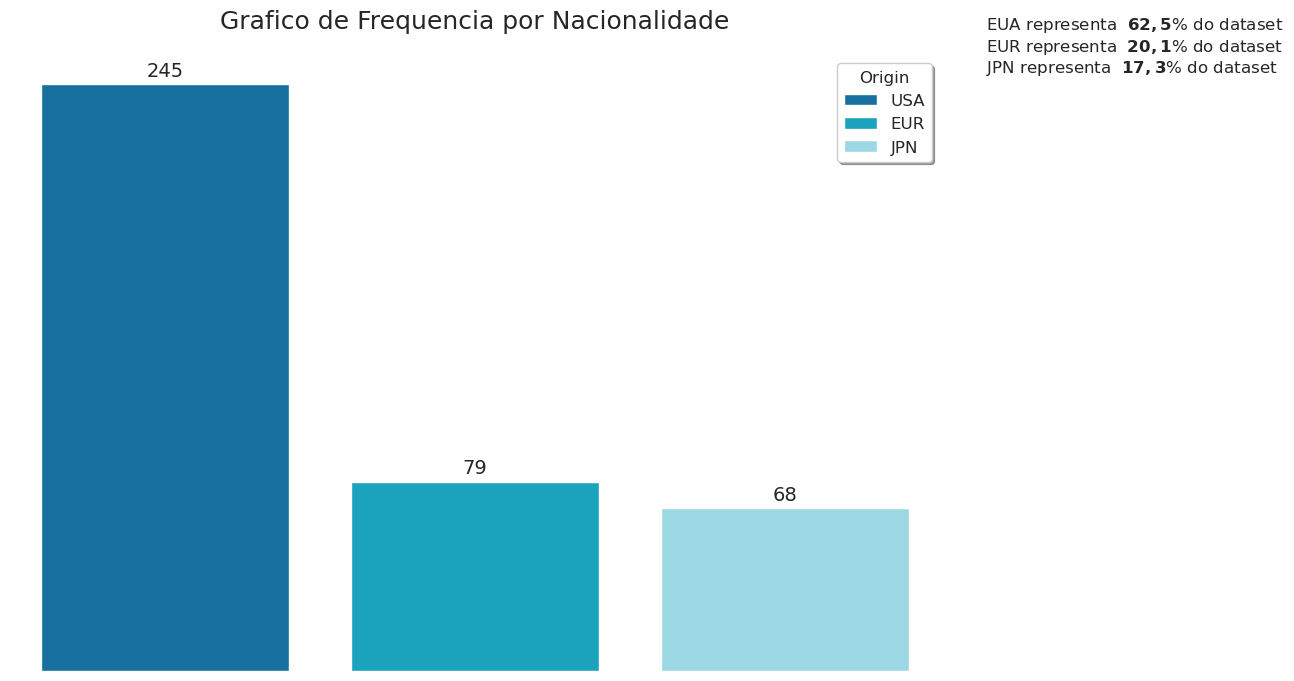

In [19]:
#grafico de frequencia de nacionalidade

def origin_viz():
    #definindo tamanho da figura,tema e cores
    fig,ax = plt.subplots(figsize=(12,8))
    sns.set_theme(style="white")
    cores = [AZUL2, AZUL3, AZUL4]

    #construindo grafico
    ax = sns.countplot(dfcat,x='origin',label=['USA','EUR','JPN'],palette=cores)
    #parametros do grafico
    sns.despine(bottom=True,left=True)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.title('Grafico de Frequencia por Nacionalidade',fontsize=18,loc='center',y=1.03)
    ax.legend(loc='upper right',title='Origin',title_fontsize = 12, fontsize = 12,shadow=True)
    for p in ax.patches:
        value = p.get_height()
        ax.annotate(f'{int(value)}', (p.get_x() + p.get_width() / 2., value),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=14)
    ax.text(1.05, 1,
            'EUA representa  $\\bf{62,5}$% do dataset \n'
            'EUR representa  $\\bf{20,1}$% do dataset \n'
            'JPN representa  $\\bf{17,3}$% do dataset \n'
         ,transform=ax.transAxes, rotation=0, va='center', ha='left')


ax = origin_viz()


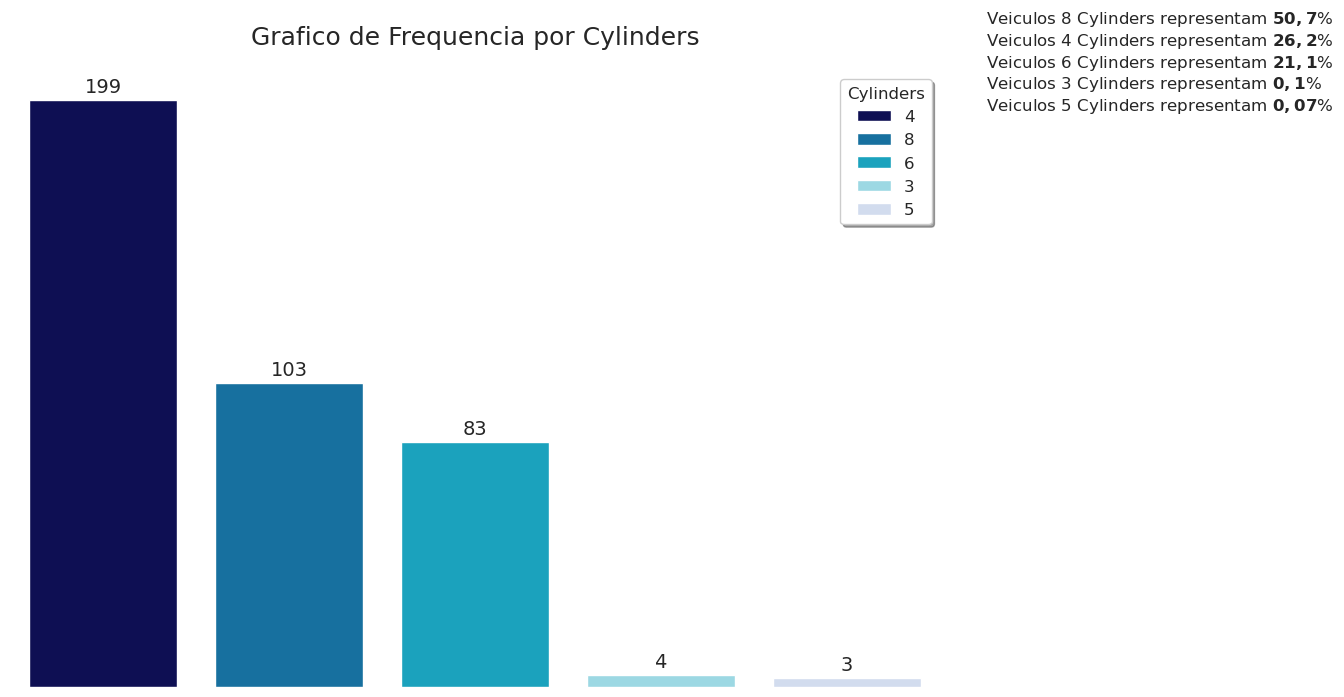

In [11]:

#grafico de frequencia de cylinders

def cylinders_viz():
    #definindo tamanho da figura,tema e cores
    fig,ax = plt.subplots(figsize=(12,8))
    sns.set_theme(style="white")
    cores = [AZUL1, AZUL2, AZUL3, AZUL4, AZUL5]

    #construindo grafico
    ax = sns.countplot(data=dfcat,x='cylinders',order=dfcat['cylinders'].value_counts().index,label=dfcat['cylinders'].value_counts().index,palette=cores)
    #parametros do grafico
    sns.despine(bottom=True,left=True)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.title('Grafico de Frequencia por Cylinders',fontsize=18,loc='center',y=1.03)
    ax.legend(loc='upper right',title='Cylinders',title_fontsize = 12, fontsize = 12,shadow=True)
    for p in ax.patches:
        value = p.get_height()
        ax.annotate(f'{int(value)}', (p.get_x() + p.get_width() / 2., value),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=14)
    ax.text(1.05, 1,
                'Veiculos 8 Cylinders representam $\\bf{50,7}$%\n'
                'Veiculos 4 Cylinders representam $\\bf{26,2}$%\n'
                'Veiculos 6 Cylinders representam $\\bf{21,1}$%\n'
                'Veiculos 3 Cylinders representam $\\bf{0,1}$%\n'
                'Veiculos 5 Cylinders representam $\\bf{0,07}$%\n'
         ,transform=ax.transAxes, rotation=0, va='center', ha='left')


ax = cylinders_viz()


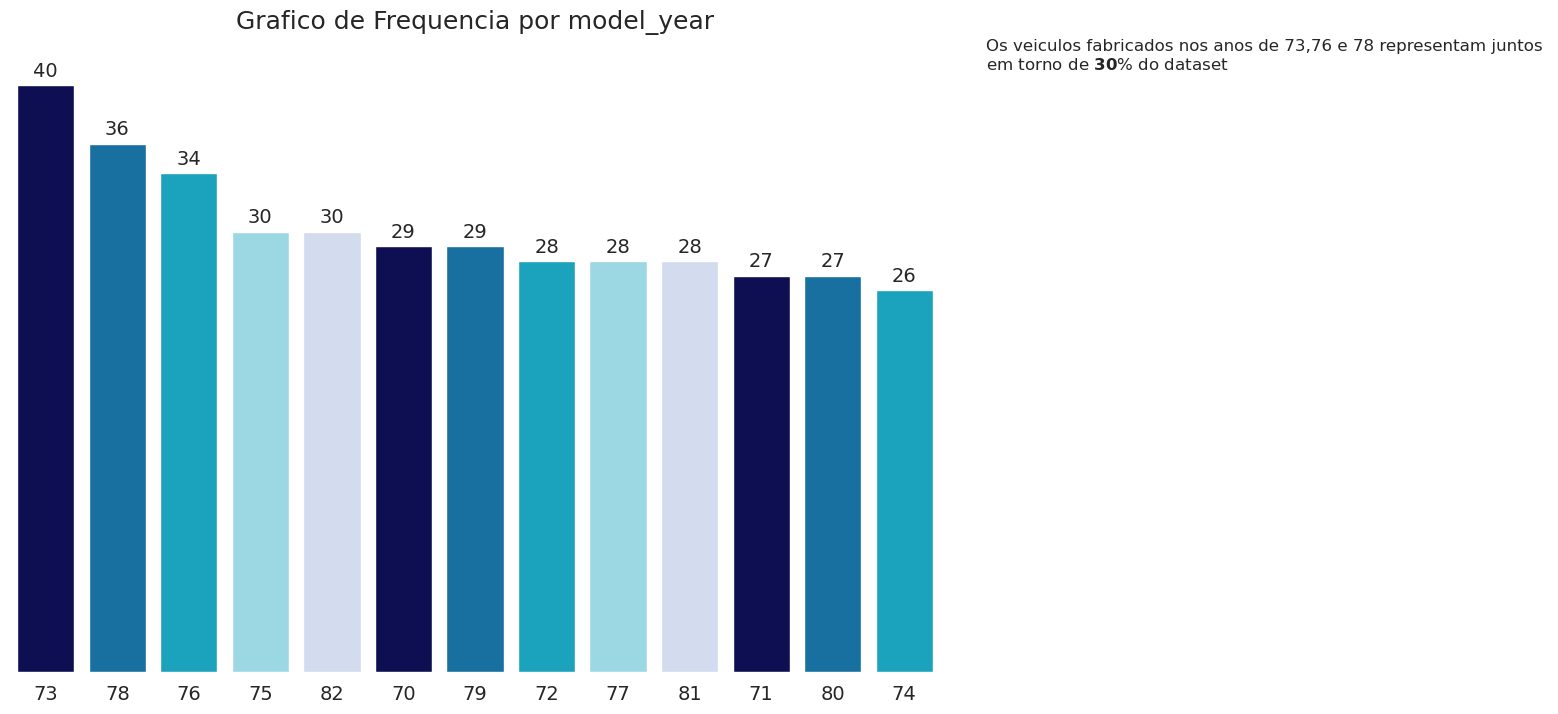

In [12]:
#grafico de frequencia de 'model_year'

def model_year_viz():
    #parametros do grafico
    fig,ax = plt.subplots(figsize=(12,8))
    sns.set_theme(style="white")
    cores = [AZUL1, AZUL2, AZUL3, AZUL4, AZUL5]
    
    #construindo o grafico
    ax = sns.countplot(data=dfcat,x='model_year',order=dfcat['model_year'].value_counts().index,label=dfcat['model_year'].value_counts().index,palette=cores)
    #parametros do grafico
    sns.despine(bottom=True,left=True)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.set_yticklabels([])
    ax.set_xticklabels(labels=list(dfcat['model_year'].value_counts().index),fontsize=14)
    plt.title('Grafico de Frequencia por model_year',fontsize=18,loc='center',y=1.03)
    for p in ax.patches:
        value = p.get_height()
        ax.annotate(f'{int(value)}', (p.get_x() + p.get_width() / 2., value),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=14)
    ax.text(1.05, 1,
                'Os veiculos fabricados nos anos de 73,76 e 78 representam juntos \nem torno de $\\bf{30}$% do dataset'
         ,transform=ax.transAxes, rotation=0, va='center', ha='left')
    
ax = model_year_viz()


In [13]:
dfcat['model_year'].value_counts(normalize=True)

model_year
73    0.102041
78    0.091837
76    0.086735
75    0.076531
82    0.076531
70    0.073980
79    0.073980
72    0.071429
77    0.071429
81    0.071429
71    0.068878
80    0.068878
74    0.066327
Name: proportion, dtype: float64

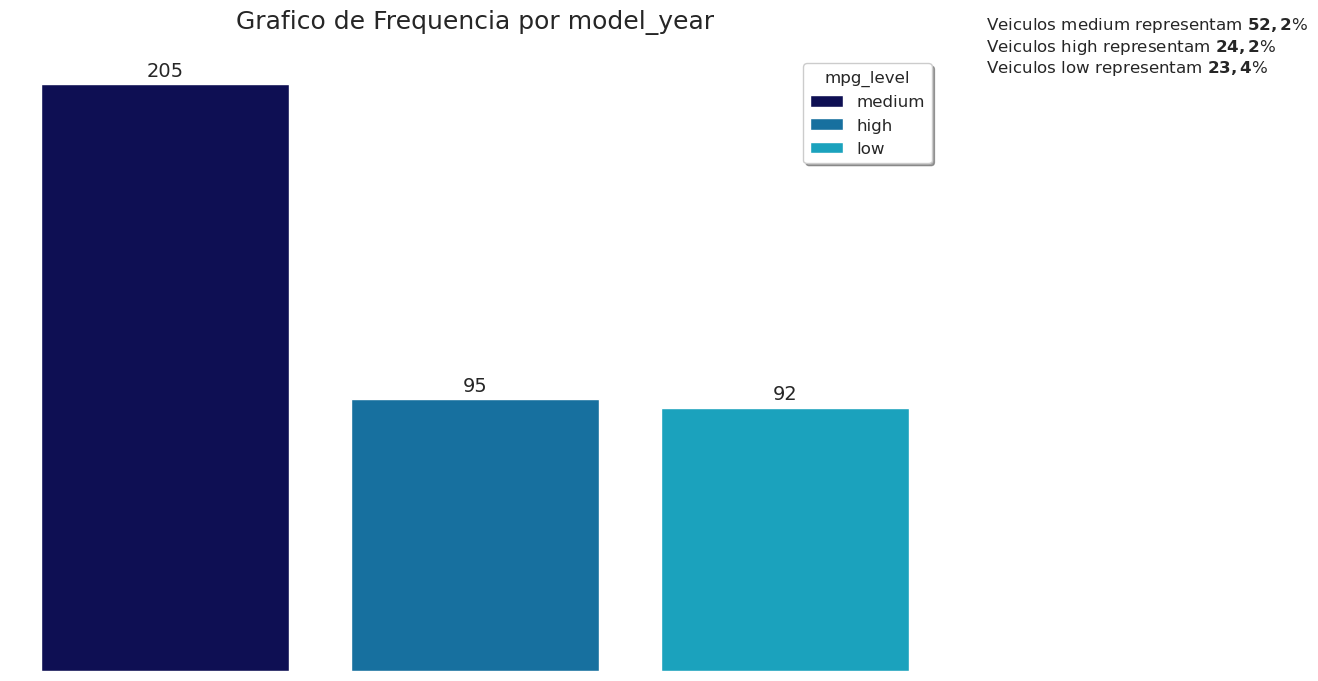

In [14]:
#grafico de frequencia de 'mpg_level'

def mpg_level_viz():
    #parametros do grafico
    fig,ax = plt.subplots(figsize=(12,8))
    sns.set_theme(style="white")
    cores = [AZUL1, AZUL2, AZUL3, AZUL4, AZUL5]
    
    #construindo o grafico
    ax = sns.countplot(data=dfcat,x='mpg_level',order=dfcat['mpg_level'].value_counts().index,label=dfcat['mpg_level'].value_counts().index,palette=cores)
    #parametros do grafico
    sns.despine(bottom=True,left=True)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.title('Grafico de Frequencia por model_year',fontsize=18,loc='center',y=1.03)
    ax.legend(loc='upper right',title='mpg_level',title_fontsize = 12, fontsize = 12,shadow=True)
    for p in ax.patches:
        value = p.get_height()
        ax.annotate(f'{int(value)}', (p.get_x() + p.get_width() / 2., value),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=14)
    ax.text(1.05, 1,
                'Veiculos medium representam $\\bf{52,2}$%\n'
                'Veiculos high representam $\\bf{24,2}$%\n'
                'Veiculos low representam $\\bf{23,4}$%\n'
         ,transform=ax.transAxes, rotation=0, va='center', ha='left')


ax = mpg_level_viz()


In [15]:
#top10 car_company

#criando dataset com as top10 car_company

company = pd.DataFrame(data['car_company'].value_counts(ascending=False)[0:10])

#criando tabela com top10 car_company relacionadas com a coluna origin

#1 criando tabela com todas as car_company e suas respectivas origin

company_origin = dfcat[['origin','car_company']].groupby(by=['origin','car_company']).count().reset_index()


#2 criando tabela filtrada com o top10 car_company

top10_list = company_origin[company_origin['car_company'].isin(list(data['car_company'].value_counts(ascending=False).index[0:10]))]


display(company,company_origin,top10_list)


,count
car_company,
ford,48
chevrolet,47
plymouth,31
dodge,28
amc,27
toyota,26
datsun,23
volkswagen,22
buick,17


,origin,car_company
0,europe,audi
1,europe,bmw
2,europe,fiat
3,europe,mercedes-benz
4,europe,opel
5,europe,peugeot
6,europe,renault
7,europe,saab
8,europe,triumph
9,europe,volkswagen


,origin,car_company
9,europe,volkswagen
11,japan,datsun
16,japan,toyota
17,usa,amc
18,usa,buick
21,usa,chevrolet
23,usa,dodge
24,usa,ford
28,usa,plymouth
29,usa,pontiac


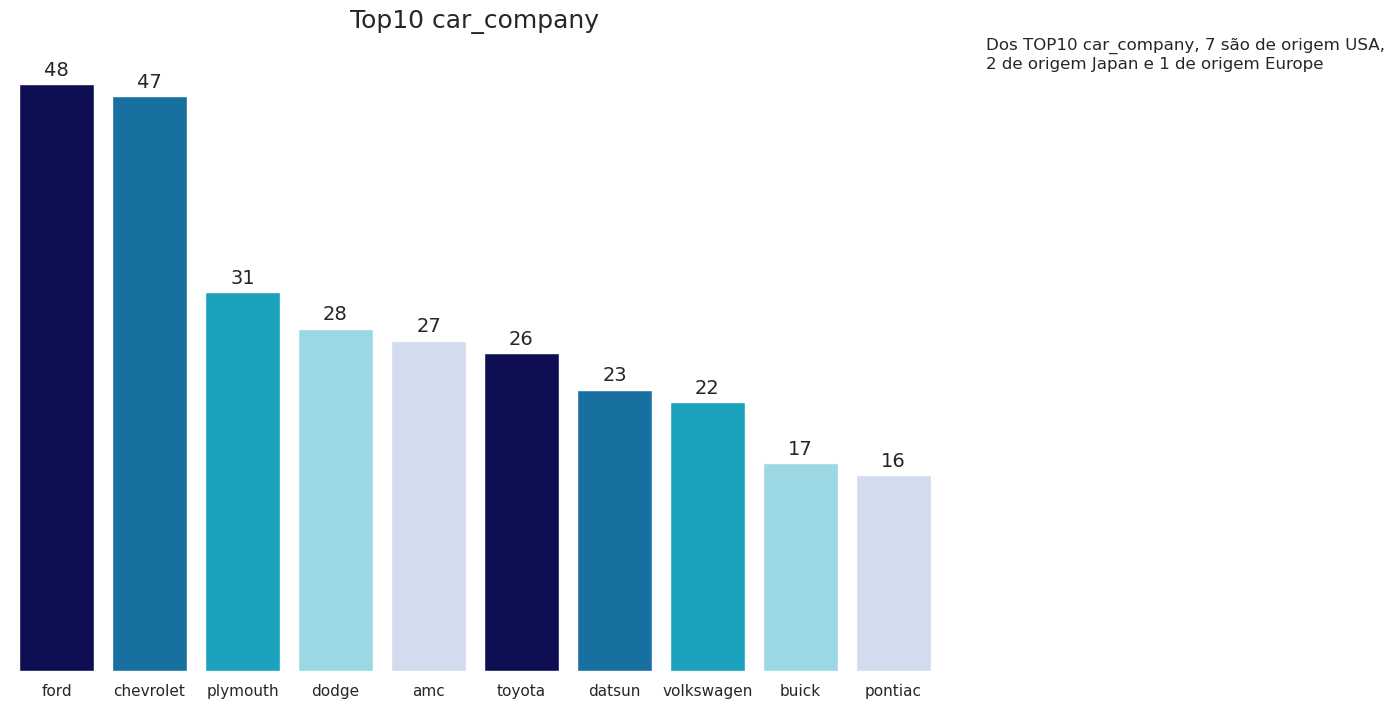

In [18]:
#grafico de frequencia top10 car_company

def car_company_viz():
    #parametros do grafico
    fig,ax = plt.subplots(figsize=(12,8))
    sns.set_theme(style="white")
    cores = [AZUL1, AZUL2, AZUL3, AZUL4, AZUL5]

    #construino o grafico
    ax = sns.barplot(data=company,x=company.index,y='count',palette=cores)
    #parametros do grafico
    sns.despine(bottom=True,left=True)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.set_yticklabels([])
    #ax.set_xticklabels([])
    plt.title('Top10 car_company',fontsize=18,loc='center',y=1.03)
    ax.text(1.05, 1,
                'Dos TOP10 car_company, 7 são de origem USA,\n2 de origem Japan e 1 de origem Europe'
         ,transform=ax.transAxes, rotation=0, va='center', ha='left')
    for p in ax.patches:
        value = p.get_height()
        ax.annotate(f'{int(value)}', (p.get_x() + p.get_width() / 2., value),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=14)

car_company_viz()

In [22]:
#inicialmente foram feitas analises simples das variaveis categoricas para sabermos pontos importantes do dataset